<a href="https://colab.research.google.com/github/abkerper/project_gss/blob/main/AgeWVisualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1_og= pd.read_parquet('/content/gss_chunk_1.parquet', engine='pyarrow')
df2_og = pd.read_parquet('/content/gss_chunk_2.parquet', engine='pyarrow')
df3_og = pd.read_parquet('/content/gss_chunk_3.parquet', engine='pyarrow')

In [3]:
df1 = df1_og
df2 = df2_og
df3 = df3_og

In [4]:
df1['age_category'] = df1['age']
df2['age_category'] = df2['age']
df3['age_category'] = df3['age']

In [5]:
for df in [df1, df2, df3]:
  df.loc[(df['age'] >= 18) & (df['age'] <= 29), 'age_category'] = 1
  df.loc[(df['age'] >= 30) & (df['age'] <= 39), 'age_category'] = 2
  df.loc[(df['age'] >= 40) & (df['age'] <= 49), 'age_category'] = 3
  df.loc[(df['age'] >= 50) & (df['age'] <= 64), 'age_category'] = 4
  df.loc[(df['age'] >= 60) & (df['age'] <= 89), 'age_category'] = 5

In [6]:
print(df1['age_category'].describe())
print(df2['age_category'].describe())
print(df3['age_category'].describe())

count    24021.000000
mean         2.907331
std          1.516681
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: age_category, dtype: float64
count    24061.000000
mean         2.991646
std          1.431380
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: age_category, dtype: float64
count    23539.000000
mean         3.279069
std          1.464390
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          5.000000
Name: age_category, dtype: float64


In [7]:
for df in [df1, df2, df3]:
  df['age'].replace(0, np.nan)
  df['age_category'].replace(0, np.nan)

In [10]:
df4 = pd.concat([df1, df2, df3], ignore_index=True)
print(df4['cappun'].value_counts())

favor                            42181
oppose                           18666
don't know                           0
iap                                  0
I don't have a job                   0
dk, na, iap                          0
no answer                            0
not imputable_(2147483637)           0
not imputable_(2147483638)           0
refused                              0
skipped on web                       0
uncodeable                           0
not available in this release        0
not available in this year           0
see codebook                         0
Name: cappun, dtype: int64


In [11]:
import numpy as np
#df4.loc[ df4['cappun'] == 'no answer'] = np.nan
cappun = df4['cappun']
cappun = cappun.replace(['no answer', 'don\'t know','iap','refused','skipped on web', 'I don\'t have a job', 'dk, na, iap', 'not imputable_(2147483637)', 'not imputable_(2147483638)', 'uncodeable', 'not available in this release', 'not available in this year', 'see codebook'], np.nan)
cappun.value_counts()

favor     42181
oppose    18666
Name: cappun, dtype: int64

In [16]:
df4['cappun'] = cappun

In [12]:
age_category = df4['age_category']
age_category.value_counts()

5.0    18388
2.0    14994
1.0    14360
3.0    12799
4.0    11080
Name: age_category, dtype: int64

<Axes: xlabel='age_category'>

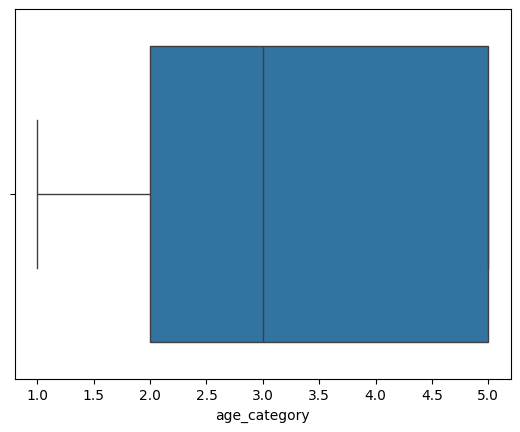

In [24]:
sns.boxplot(data=df4,x='age_category')

In [15]:
print(pd.crosstab(age_category,cappun, normalize = 'all'),'\n')

cappun           favor    oppose
age_category                    
1.0           0.134880  0.067091
2.0           0.147145  0.063933
3.0           0.125357  0.051320
4.0           0.107924  0.045453
5.0           0.178920  0.077976 



<Axes: xlabel='age_category', ylabel='Density'>

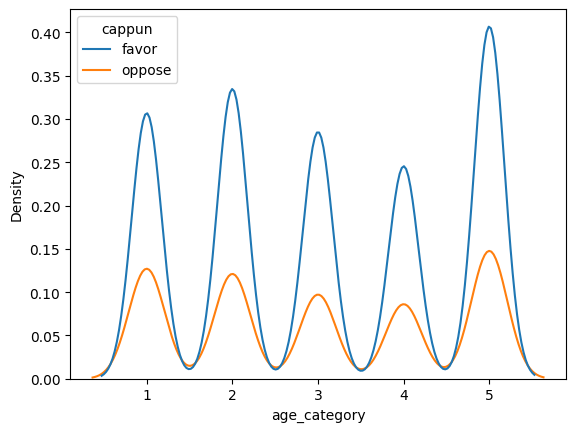

In [18]:
sns.kdeplot(data=df4,x='age_category',hue='cappun')

In [20]:
df4.loc[:,['cappun','age_category']].groupby('cappun').describe()

age_category                                             
              count      mean       std  min  25%  50%  75%  max
cappun                                                          
favor       41773.0  3.070380  1.473286  1.0  2.0  3.0  5.0  5.0
oppose      18399.0  3.010761  1.501817  1.0  2.0  3.0  5.0  5.0

<Axes: xlabel='age_category', ylabel='Count'>

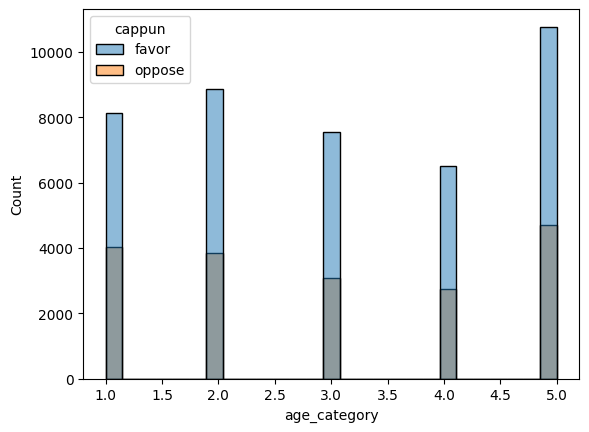

In [30]:
sns.histplot(data=df4, x=age_category, hue = cappun)